### Plotter for ECE220 UCSB Dektak Images
Usage: replace "Filename" with xml filename.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
import xml.etree.ElementTree as Xet

In [41]:
# XML data path
Filenames = ['STEP9_SAMPLE3_DEKTAK_POSTETCH.xml', 'STEP9_SAMPLE4_DEKTAK_POSTETCH.xml', 'STEP9_SAMPLE5_DEKTAK_POSTETCH.xml']

parsed_dataframes = []

for i, filename in enumerate(Filenames):
    tree = Xet.parse(filename)
    root = tree.getroot()

    # Data from XML and store it in a list of dictionaries
    data_list = []

    for data_elem in root.findall('.//Data'):
        x = float(data_elem.find('X').text)
        z = float(data_elem.find('Z').text)
        data_list.append({'X': x, 'Z': z})

    # Create a pd dataframe from the list of dictionaries
    df = pd.DataFrame(data_list)
    parsed_dataframes.append(df)



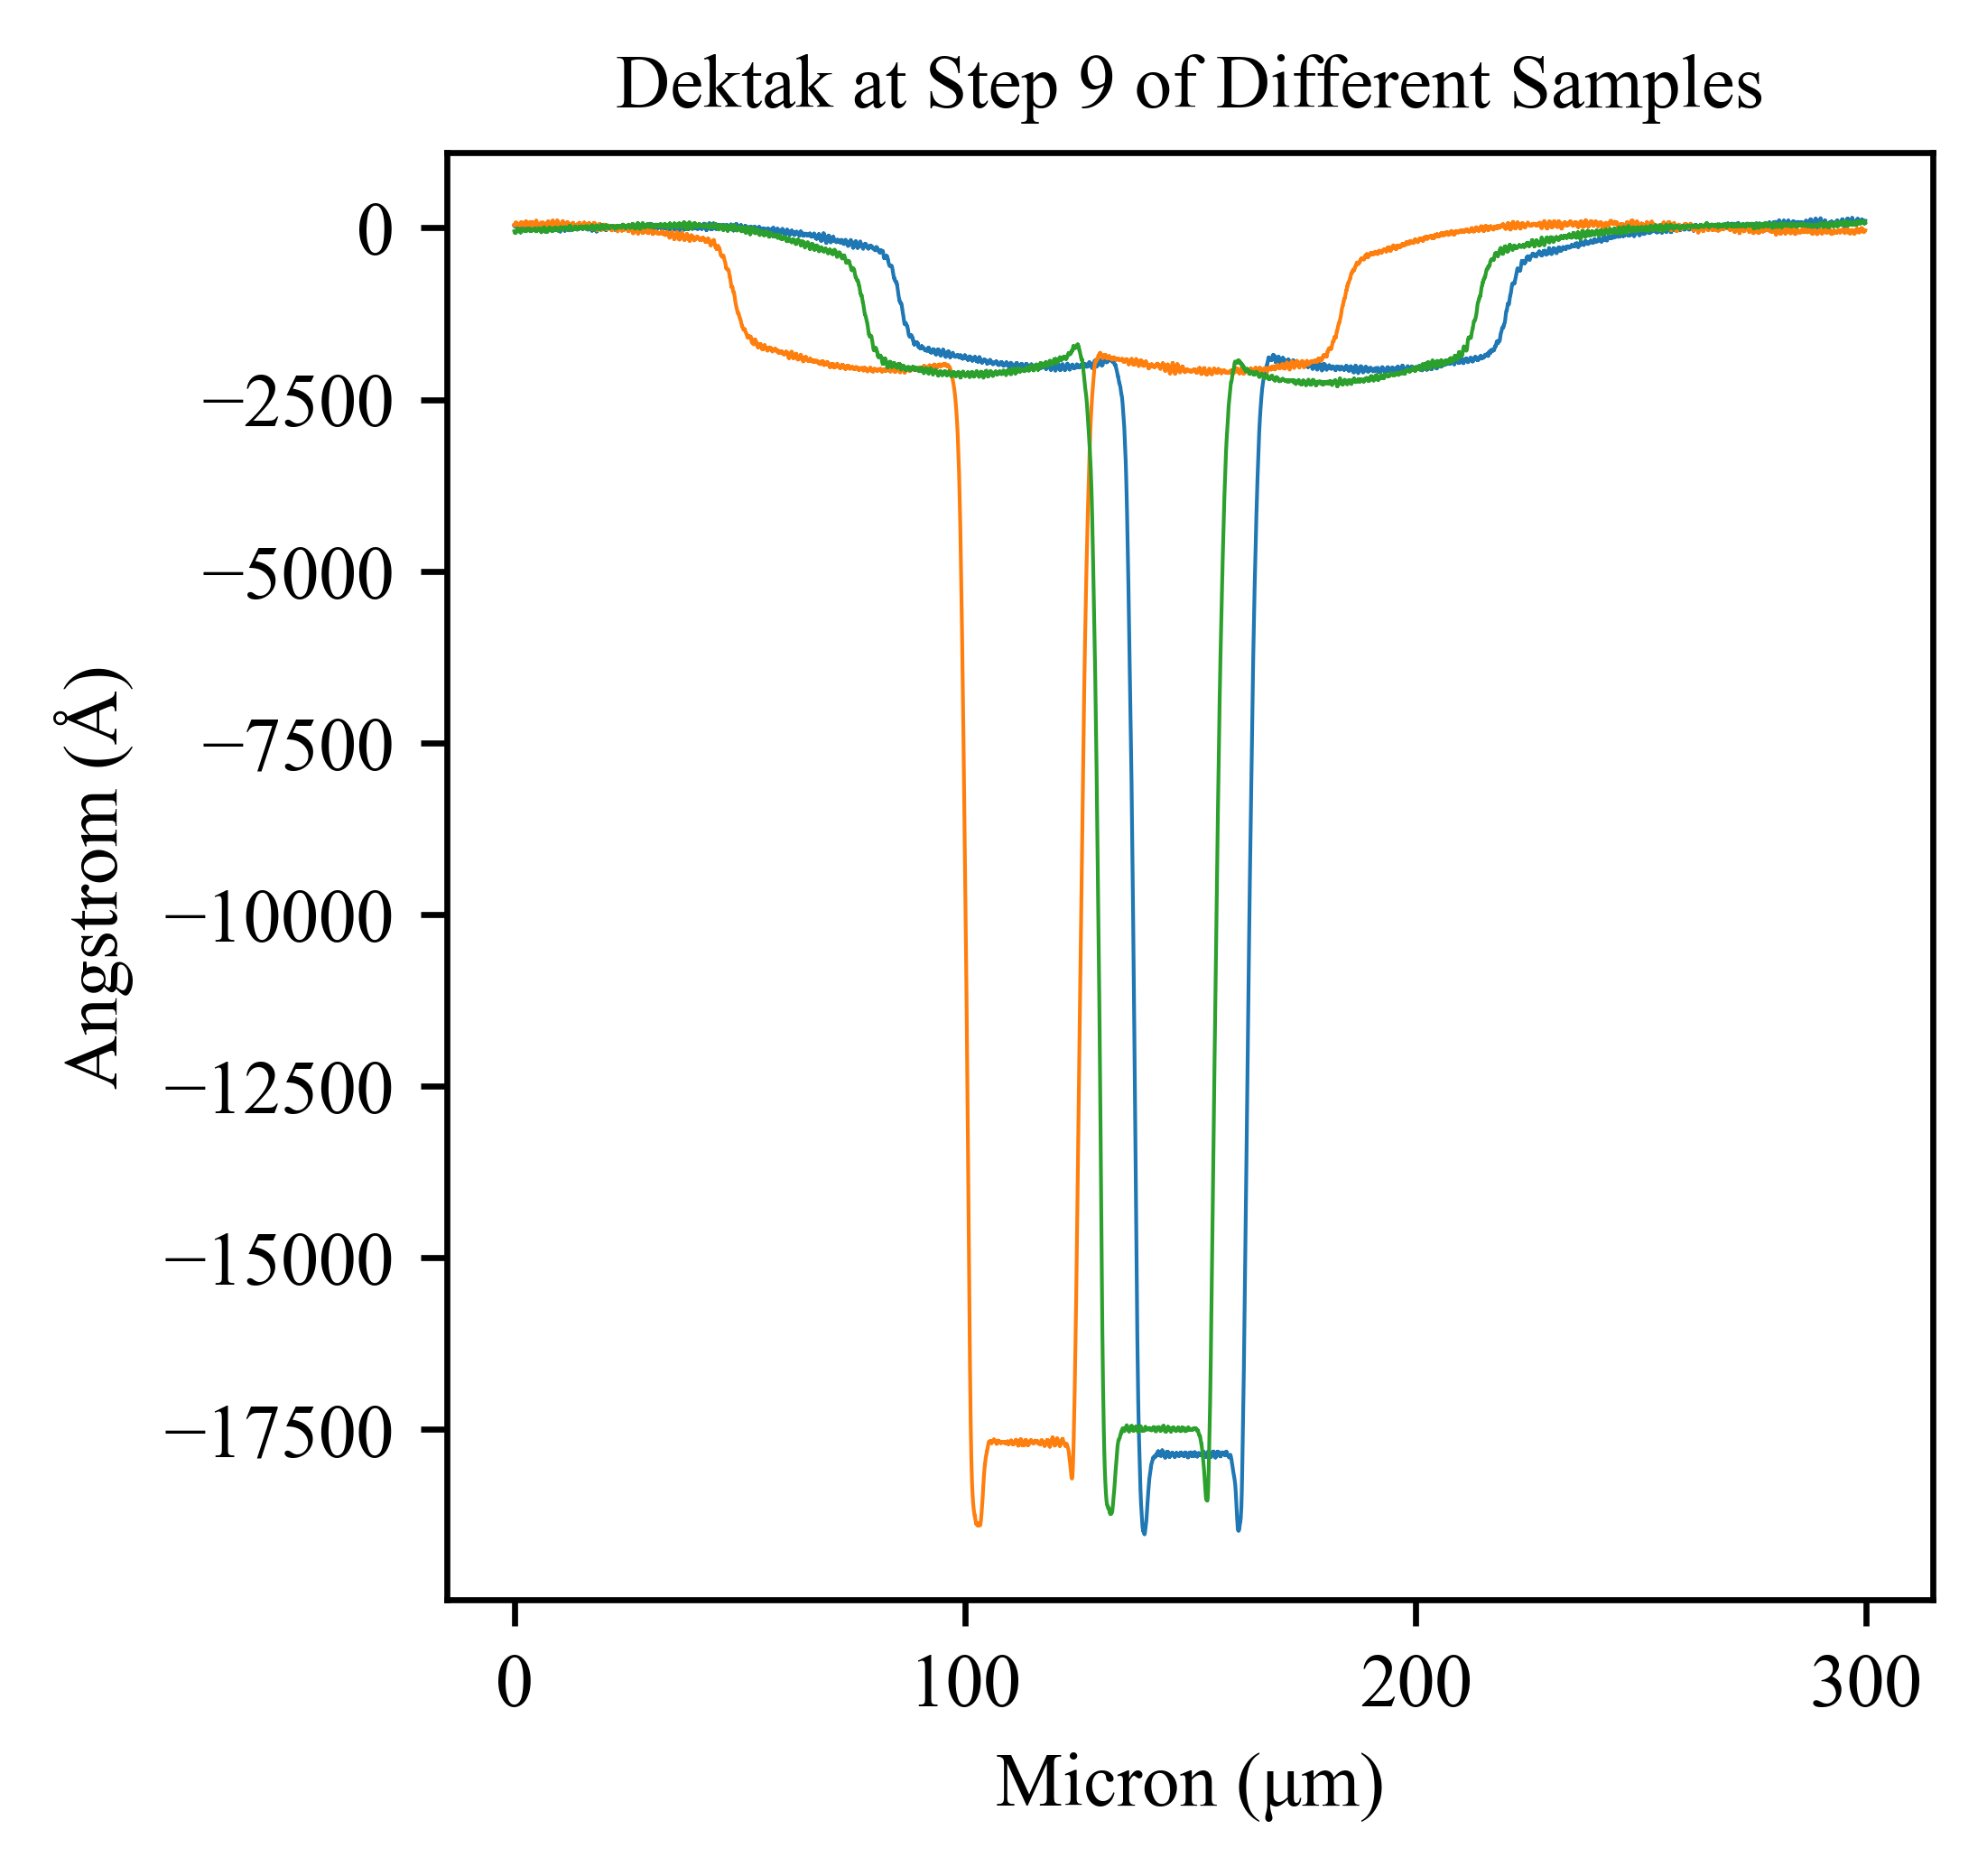

In [42]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(3.54,3.54), dpi=600)
plt.xlabel('Micron (μm)', fontsize=10)
plt.ylabel('Angstrom (Å)', fontsize=10)
plt.title('Dektak at Step 9 of Different Samples', fontsize=10)

for i in parsed_dataframes:
    df = i
    x = df[df.columns[0]]
    y = df[df.columns[1]]
    plt.plot(x,y,linewidth=0.5,zorder=1, label = "")#, color = 'blue')

In [43]:
# activate Bokeh output in Jupyter notebook
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [57]:
# Bokeh plot
plot = figure(x_axis_label='Micron (μm)', y_axis_label='Angstrom (Å)')

palette = Category10[10]

# Sample to skip
skip_sample = 4

# Iterate over parsed_dataframes and plot each dataframe with a different color
for i, df in enumerate(parsed_dataframes):
    # Skip plotting for a sample number (continue just skips values)
    if i + 3 == skip_sample:
        continue
    
    x = df[df.columns[0]]
    y = df[df.columns[1]]
    
    # Use a color from the palette for each line
    color = palette[i % 10]
    plot.line(x, y, line_color=color, legend_label=f'Sample {i+3}')

# Show the plot
show(plot)